# PPG Field Study Dataset
## 0/ Imports des modules

In [1]:
import pickle
import pandas as pd

## 1/ Chargement des données

In [2]:
path = "./data/S1/S1.pkl"

In [3]:
with open(path, "rb") as f:
    data = pickle.load(f, encoding="latin-1")

## 2/ Analyse des données

In [4]:
data.keys()

dict_keys(['rpeaks', 'signal', 'label', 'activity', 'questionnaire', 'subject'])

In [5]:
pd.DataFrame(data["signal"])

,chest,wrist
ACC,"[[0.8564000129699707, -0.06779998540878296, -0...","[[-0.765625, -0.078125, 0.671875], [-0.765625,..."
ECG,"[[0.015609741210937498], [0.01812744140625], [...",NaN
EMG,"[[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...",NaN
EDA,"[[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....","[[4.722437], [4.728843], [4.718594], [4.717312..."
Temp,"[[-273.15], [-273.15], [-273.15], [-273.15], [...",NaN
Resp,"[[4.44183349609375], [4.45098876953125], [4.47...",NaN
BVP,NaN,"[[7.28], [6.33], [5.46], [4.6], [3.74], [2.86]..."
TEMP,NaN,"[[32.13], [32.16], [32.16], [32.16], [32.16], ..."


## 3/ Création de DataFrame

In [6]:
dfs  = []
pbms = []
oks  = []
for key in data.keys():
    try:
        df = pd.DataFrame(data[key])
        #df = df.dropna()
        dfs.append(df)
        oks.append(key)
    except Exception as e:
        pbms.append(key + str(e))
print(f"clefs ok = {oks}")
print(f"clefs avec un pbms = {pbms}")

clefs ok = ['rpeaks', 'signal', 'label', 'activity']
clefs avec un pbms = ['questionnaireIf using all scalar values, you must pass an index', 'subjectDataFrame constructor not properly called!']


### 3.1/ Regarder les DataFrames

In [7]:
for df in dfs:
    print(df)

0
0          240
1         1174
2         2128
3         3099
4         3907
...        ...
11426  6446343
11427  6446825
11428  6447292
11429  6447748
11430  6448224

[11431 rows x 1 columns]
                                                  chest  \
ACC   [[0.8564000129699707, -0.06779998540878296, -0...   
ECG   [[0.015609741210937498], [0.01812744140625], [...   
EMG   [[-1.5], [-1.5], [-1.5], [-1.5], [-1.5], [-1.5...   
EDA   [[0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0....   
Temp  [[-273.15], [-273.15], [-273.15], [-273.15], [...   
Resp  [[4.44183349609375], [4.45098876953125], [4.47...   
BVP                                                 NaN   
TEMP                                                NaN   

                                                  wrist  
ACC   [[-0.765625, -0.078125, 0.671875], [-0.765625,...  
ECG                                                 NaN  
EMG                                                 NaN  
EDA   [[4.722437], [4.728843], [4.718594], 

In [12]:
dfchest = dfs[1]['chest'].dropna()
print("Shape of Chest")
for dfc in dfchest:
    print(dfc.shape)
dfwrist = dfs[1]['wrist'].dropna()
print("\nShape of Wrist")
for dfw in dfwrist:
    print(dfw.shape[0])

Shape of Chest
(6448400, 3)
(6448400, 1)
(6448400, 1)
(6448400, 1)
(6448400, 1)
(6448400, 1)

Shape of Wrist
294784
36848
589568
36848


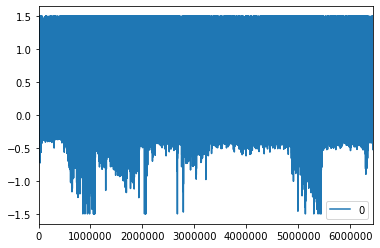

In [9]:
ecg = []
for ecgElement in dfchest['ECG']:
    ecg.append(ecgElement)
ECGdf = pd.DataFrame(ecg)
ECGdf.plot()

In [14]:
ecgSampled = []
windowSize = dfchest['ECG'].shape[0]/dfwrist['EDA'].shape[0]
for ecgElement in 

175.0

In [0]:
df = dfs[0]
df.plot()
df = dfs[2]
df.plot()
df = dfs[3]
df.plot()